# Imports

In [35]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
artist_df = pd.read_feather('cleaned_data/cleaned_artist.feather')
album_df = pd.read_feather('cleaned_data/cleaned_album.feather')
track_df = pd.read_feather('cleaned_data/cleaned_track.feather')
track_feature_df = pd.read_feather('cleaned_data/cleaned_track_features.feather')

# Explore

## Create a complete dataframe for working in pandas

In [18]:
print(artist_df.shape)
print(album_df.shape)
print(track_df.shape)
print(track_feature_df.shape)

(20, 9)
(459, 9)
(5058, 9)
(5057, 11)


In [19]:
complete_track_df = track_df.merge(track_feature_df, how='outer', on='track_id')
complete_track_df

,track_id,song_name,external_url,duration_ms,explicit,disc_number,type_x,song_uri_x,album_id,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,type_y,valence,song_uri_y
0,6DUqgJGRai5W7vgSxwSmRk,"Poème for Violin and Orchestra, Op. 25",https://open.spotify.com/track/6DUqgJGRai5W7vg...,1023040,False,1,track,spotify:track:6DUqgJGRai5W7vgSxwSmRk,2NjZtmTa1FRYlc629X8ueC,0.121,0.1240,0.560000,0.1070,-22.930,0.0418,91.838,audio_features,0.0352,spotify:track:6DUqgJGRai5W7vgSxwSmRk
1,2RV5ZQOformmqqslmPN4G9,"Violin Concerto No. 1 in D Major, Op. 19: I. A...",https://open.spotify.com/track/2RV5ZQOformmqqs...,576480,False,1,track,spotify:track:2RV5ZQOformmqqslmPN4G9,2NjZtmTa1FRYlc629X8ueC,0.294,0.1440,0.188000,0.3840,-25.954,0.0482,106.247,audio_features,0.0809,spotify:track:2RV5ZQOformmqqslmPN4G9
2,6BlCXoqaXBilMA62hLBCtT,"Violin Concerto No. 1 in D Major, Op. 19: II. ...",https://open.spotify.com/track/6BlCXoqaXBilMA6...,234720,False,1,track,spotify:track:6BlCXoqaXBilMA62hLBCtT,2NjZtmTa1FRYlc629X8ueC,0.472,0.2700,0.789000,0.0552,-23.245,0.0920,150.013,audio_features,0.4670,spotify:track:6BlCXoqaXBilMA62hLBCtT
3,6gnH9b4GiS7fSXaaY94gG8,"Violin Concerto No. 1 in D Major, Op. 19: III....",https://open.spotify.com/track/6gnH9b4GiS7fSXa...,483600,False,1,track,spotify:track:6gnH9b4GiS7fSXaaY94gG8,2NjZtmTa1FRYlc629X8ueC,0.237,0.1210,0.256000,0.2710,-22.860,0.0386,103.345,audio_features,0.0710,spotify:track:6gnH9b4GiS7fSXaaY94gG8
4,5sjFGklnKyQmEBN9WEMXkm,Deux Sérénades (Written for Hilary Hahn): No. ...,https://open.spotify.com/track/5sjFGklnKyQmEBN...,470400,False,1,track,spotify:track:5sjFGklnKyQmEBN9WEMXkm,2NjZtmTa1FRYlc629X8ueC,0.109,0.0788,0.732000,0.1080,-25.191,0.0460,91.888,audio_features,0.0360,spotify:track:5sjFGklnKyQmEBN9WEMXkm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5053,0Qwt99sGnAMJ8RlTqFdrLW,Embrace the Wind!: No. 8. Whirligig of the Rel...,https://open.spotify.com/track/0Qwt99sGnAMJ8Rl...,266760,False,1,track,spotify:track:0Qwt99sGnAMJ8RlTqFdrLW,2qy5MbzMF34NyUMWJ4ghAn,0.606,0.1250,0.451000,0.0636,-9.438,0.0753,103.352,audio_features,0.4400,spotify:track:0Qwt99sGnAMJ8RlTqFdrLW
5054,1h2OlORCn9DcTN6hyaojNd,Embrace the Wind!: Interlude 7: Chilling Wind,https://open.spotify.com/track/1h2OlORCn9DcTN6...,150000,False,1,track,spotify:track:1h2OlORCn9DcTN6hyaojNd,2qy5MbzMF34NyUMWJ4ghAn,0.357,0.0617,0.012000,0.1670,-15.822,0.0585,75.210,audio_features,0.1310,spotify:track:1h2OlORCn9DcTN6hyaojNd
5055,1SneXZBLDralTKJYpspzLc,Embrace the Wind!: No. 9. Mobile Turning in th...,https://open.spotify.com/track/1SneXZBLDralTKJ...,714000,False,1,track,spotify:track:1SneXZBLDralTKJYpspzLc,2qy5MbzMF34NyUMWJ4ghAn,0.342,0.1500,0.773000,0.1240,-10.314,0.0312,94.028,audio_features,0.1510,spotify:track:1SneXZBLDralTKJYpspzLc
5056,5mrGO9IpAvGmqCjIUB0jcV,The End of Love,https://open.spotify.com/track/5mrGO9IpAvGmqCj...,269916,False,1,track,spotify:track:5mrGO9IpAvGmqCjIUB0jcV,3unmbt2xfH7QW1ns53O9Nz,0.275,0.0686,0.000308,0.1900,-16.489,0.0345,130.117,audio_features,0.0669,spotify:track:5mrGO9IpAvGmqCjIUB0jcV


In [24]:
complete_album_df = complete_track_df.merge(album_df, how='outer', on='album_id')
print(complete_album_df.shape)
# complete_album_df.head(10)

(5059, 27)


In [25]:
df = complete_album_df.merge(artist_df, how='outer', on='artist_id')
df.shape

C:\Users\00986562\AppData\Local\Temp\ipykernel_34768\100949707.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'type_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = complete_album_df.merge(artist_df, how='outer', on='artist_id')


(5059, 35)

In [27]:
df.columns

Index(['track_id', 'song_name', 'external_url_x', 'duration_ms', 'explicit',
       'disc_number', 'type_x', 'song_uri_x', 'album_id', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'type_y', 'valence', 'song_uri_y', 'album_name',
       'external_url_y', 'image_url_x', 'release_date', 'total_tracks',
       'type_x', 'album_uri', 'artist_id', 'artist_name', 'external url',
       'genre', 'image_url_y', 'followers', 'popularity', 'type_y',
       'artist_uri'],
      dtype='object')

In [28]:
useful_cols = ['artist_name', 'genre', 'followers', 'popularity',
               'album_name', 'release_date', 'total_tracks',
               'song_name', 'duration_ms', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
               'artist_id', 'album_id', 'track_id']

In [29]:
df = df[useful_cols]

In [31]:
df.to_feather('full_info_df.feather')

## Load dataframe

In [32]:
df = pd.read_feather('full_info_df.feather')

In [33]:
df

,artist_name,genre,followers,popularity,album_name,release_date,total_tracks,song_name,duration_ms,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,artist_id,album_id,track_id
0,Hilary Hahn,classical performance,131959.0,49.0,Paris,2021-03-05,6.0,"Poème for Violin and Orchestra, Op. 25",1023040.0,0.121,0.1240,0.560000,0.1070,-22.930,0.0418,91.838,0.0352,5JdT0LYJdlPbTC58p60WTX,2NjZtmTa1FRYlc629X8ueC,6DUqgJGRai5W7vgSxwSmRk
1,Hilary Hahn,classical performance,131959.0,49.0,Paris,2021-03-05,6.0,"Violin Concerto No. 1 in D Major, Op. 19: I. A...",576480.0,0.294,0.1440,0.188000,0.3840,-25.954,0.0482,106.247,0.0809,5JdT0LYJdlPbTC58p60WTX,2NjZtmTa1FRYlc629X8ueC,2RV5ZQOformmqqslmPN4G9
2,Hilary Hahn,classical performance,131959.0,49.0,Paris,2021-03-05,6.0,"Violin Concerto No. 1 in D Major, Op. 19: II. ...",234720.0,0.472,0.2700,0.789000,0.0552,-23.245,0.0920,150.013,0.4670,5JdT0LYJdlPbTC58p60WTX,2NjZtmTa1FRYlc629X8ueC,6BlCXoqaXBilMA62hLBCtT
3,Hilary Hahn,classical performance,131959.0,49.0,Paris,2021-03-05,6.0,"Violin Concerto No. 1 in D Major, Op. 19: III....",483600.0,0.237,0.1210,0.256000,0.2710,-22.860,0.0386,103.345,0.0710,5JdT0LYJdlPbTC58p60WTX,2NjZtmTa1FRYlc629X8ueC,6gnH9b4GiS7fSXaaY94gG8
4,Hilary Hahn,classical performance,131959.0,49.0,Paris,2021-03-05,6.0,Deux Sérénades (Written for Hilary Hahn): No. ...,470400.0,0.109,0.0788,0.732000,0.1080,-25.191,0.0460,91.888,0.0360,5JdT0LYJdlPbTC58p60WTX,2NjZtmTa1FRYlc629X8ueC,5sjFGklnKyQmEBN9WEMXkm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5054,Erik Rohde,classical performance,0.0,0.0,Robert J. Martin: Embrace the Wind!,2016-08-12,16.0,Embrace the Wind!: Interlude 7: Chilling Wind,150000.0,0.357,0.0617,0.012000,0.1670,-15.822,0.0585,75.210,0.1310,6KraTyDjy9rkCU3zXRhKsw,2qy5MbzMF34NyUMWJ4ghAn,1h2OlORCn9DcTN6hyaojNd
5055,Erik Rohde,classical performance,0.0,0.0,Robert J. Martin: Embrace the Wind!,2016-08-12,16.0,Embrace the Wind!: No. 9. Mobile Turning in th...,714000.0,0.342,0.1500,0.773000,0.1240,-10.314,0.0312,94.028,0.1510,6KraTyDjy9rkCU3zXRhKsw,2qy5MbzMF34NyUMWJ4ghAn,1SneXZBLDralTKJYpspzLc
5056,7 Days A Cappella,college a cappella,634.0,5.0,The End of Love,2019-05-29,1.0,The End of Love,269916.0,0.275,0.0686,0.000308,0.1900,-16.489,0.0345,130.117,0.0669,3SQcJxIGUTZjNQaNx7vDZB,3unmbt2xfH7QW1ns53O9Nz,5mrGO9IpAvGmqCjIUB0jcV
5057,7 Days A Cappella,college a cappella,634.0,5.0,22(OVER S∞∞N),2018-09-19,1.0,22(OVER S∞∞N),146359.0,0.284,0.2100,0.000009,0.1010,-10.451,0.0331,73.551,0.0493,3SQcJxIGUTZjNQaNx7vDZB,3RzPenSm6eejRdSIwHef12,38GOszCvj4vdjiGuf3WdwV


# Viz

Visualization ideas:

* Highest number of followers

* Best release day of the week, month (season)

* Release schedule by artist, year (dotted line plot)

* Popularity vs average track length (scatter plot)

* Average track length per album (bar plot)

## Highest number of followers

In [39]:
total = artist_df['followers'].sum()
(3607048+3221533) / total

0.8387219005088772

In [47]:
(3607048+3221533+562109+273579) / total

0.9413654552375188

In [ ]:
colors = []
for i in range(16):
    colors.append('lightgray')
for i in range(2):
    colors.append('lightsteelblue')
for i in range(2):
    colors.append('mediumblue')

artist_df.sort_values('followers', inplace=True)

fig, ax = plt.subplots(figsize=(20, 10))
ax.axes.get_xaxis().set_visible(False)
ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlim(0, 4.4e6)
hbars = ax.barh(
    y=artist_df['artist_name'],
    width=artist_df['followers'],
    height=0.5,
    color=colors)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.bar_label(hbars, fmt=' %.0f followers')

ax.set_title('Two artists account for nearly 84% of followers in dataset',
            fontdict={
                'weight': 'bold',
                'size': 28,
                'color': 'mediumblue'
            },
            loc='left')

rectangle_4 = matplotlib.patches.Rectangle((0, 15.5), 4.1e6, 2, linewidth=1, linestyle='--', edgecolor='lightsteelblue', facecolor='none')
ax.add_patch(rectangle_4)
rectangle_2 = matplotlib.patches.Rectangle((0, 17.5), 4.1e6, 2, linewidth=2, edgecolor='mediumblue', facecolor='none')
ax.add_patch(rectangle_2)

ax.text(1.5e6, 16.33, '(four most popular artists total more than 94%)', color='lightsteelblue')
plt.savefig('./viz/popular_artists.pdf', format='pdf')

## Best release day/season

In [137]:
album_df['day_of_week'] = album_df['release_date'].dt.day_name()
album_df['release_month'] = album_df['release_date'].dt.month_name()

In [141]:
spring = ['March', 'April', 'May']
summer = ['June', 'July', 'August']
autumn = ['September', 'October', 'November']
winter = ['December', 'January', 'February']

def sort_season(row):
    if row['release_month'] in spring:
        return 'Spring'
    elif row['release_month'] in summer:
        return 'Summer'
    elif row['release_month'] in autumn:
        return 'Autumn'
    else:
        return 'Winter'

album_df['release_season'] = album_df.apply(sort_season, axis=1)

In [160]:
def sort_season(row):
    if row['release_month'] in spring:
        return 'Spring'
    elif row['release_month'] in summer:
        return 'Summer'
    elif row['release_month'] in autumn:
        return 'Autumn'
    else:
        return 'Winter'

In [161]:
album_df['release_season'] = album_df.apply(sort_season, axis=1)

In [ ]:
album_df

,album_id,album_name,external_url,image_url,release_date,total_tracks,type,album_uri,artist_id,day_of_week,release_month,release_season
0,2NjZtmTa1FRYlc629X8ueC,Paris,https://open.spotify.com/album/2NjZtmTa1FRYlc6...,https://i.scdn.co/image/ab67616d0000b27365625b...,2021-03-05,6,album,spotify:album:2NjZtmTa1FRYlc629X8ueC,5JdT0LYJdlPbTC58p60WTX,Friday,March,Spring
1,0C7mN21DMgaosXkuqVgnvb,García Abril: 6 Partitas,https://open.spotify.com/album/0C7mN21DMgaosXk...,https://i.scdn.co/image/ab67616d0000b2738feb2e...,2019-05-17,6,album,spotify:album:0C7mN21DMgaosXkuqVgnvb,5JdT0LYJdlPbTC58p60WTX,Friday,May,Spring
2,2ot197WiXh41pOZaY726OZ,Hilary Hahn plays Bach: Violin Sonatas Nos. 1 ...,https://open.spotify.com/album/2ot197WiXh41pOZ...,https://i.scdn.co/image/ab67616d0000b273deacd2...,2018-10-05,16,album,spotify:album:2ot197WiXh41pOZaY726OZ,5JdT0LYJdlPbTC58p60WTX,Friday,October,Autumn
3,4PwefaueJI4fG1JLBBjNXX,Retrospective,https://open.spotify.com/album/4PwefaueJI4fG1J...,https://i.scdn.co/image/ab67616d0000b273e8b77f...,2018-01-19,17,album,spotify:album:4PwefaueJI4fG1JLBBjNXX,5JdT0LYJdlPbTC58p60WTX,Friday,January,Winter
4,5GDrGfzGDod15dudivfFV5,"Mozart: Violin Concerto No.5 In A, K.219 / Vie...",https://open.spotify.com/album/5GDrGfzGDod15du...,https://i.scdn.co/image/ab67616d0000b2734a4382...,2014-03-13,7,album,spotify:album:5GDrGfzGDod15dudivfFV5,5JdT0LYJdlPbTC58p60WTX,Thursday,March,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...
454,0YPgJ6gvBCyALojltkofir,"String Trios by Tartaglia, Davidson, Skrowacze...",https://open.spotify.com/album/0YPgJ6gvBCyALoj...,https://i.scdn.co/image/ab67616d0000b27343497b...,2007-01-01,12,album,spotify:album:0YPgJ6gvBCyALojltkofir,6zNF02M8JmsXZWhLxnLMAi,Monday,January,Winter
455,5ZXoW2nmfStktjeEWcyKca,Colson: Rise,https://open.spotify.com/album/5ZXoW2nmfStktje...,https://i.scdn.co/image/ab67616d0000b273561813...,2022-04-22,12,album,spotify:album:5ZXoW2nmfStktjeEWcyKca,0d8gkFgjbet6scfFfTCIDG,Friday,April,Spring
456,2qy5MbzMF34NyUMWJ4ghAn,Robert J. Martin: Embrace the Wind!,https://open.spotify.com/album/2qy5MbzMF34NyUM...,https://i.scdn.co/image/ab67616d0000b273998de5...,2016-08-12,16,album,spotify:album:2qy5MbzMF34NyUMWJ4ghAn,6KraTyDjy9rkCU3zXRhKsw,Friday,August,Summer
457,3unmbt2xfH7QW1ns53O9Nz,The End of Love,https://open.spotify.com/album/3unmbt2xfH7QW1n...,https://i.scdn.co/image/ab67616d0000b273691413...,2019-05-29,1,single,spotify:album:3unmbt2xfH7QW1ns53O9Nz,3SQcJxIGUTZjNQaNx7vDZB,Wednesday,May,Spring


In [165]:
album_df.dtypes

album_id                  object
album_name                object
external_url              object
image_url                 object
release_date      datetime64[ns]
total_tracks               int64
type                      object
album_uri                 object
artist_id                 object
day_of_week               object
release_month             object
release_season            object
dtype: object

In [172]:
filtered_album_df = album_df[~((album_df['release_date'].dt.month == 1) & (album_df['release_date'].dt.day == 1))]

In [175]:
(filtered_album_df['release_date'].dt.month == 1).sum()

23

In [176]:
best_releases_df[ = filtered_album_df['day_of_week'].value_counts()

Friday       195
Tuesday       80
Monday        45
Thursday      21
Wednesday     18
Saturday      11
Sunday         8
Name: day_of_week, dtype: int64

ValueError: x and y must be the same size

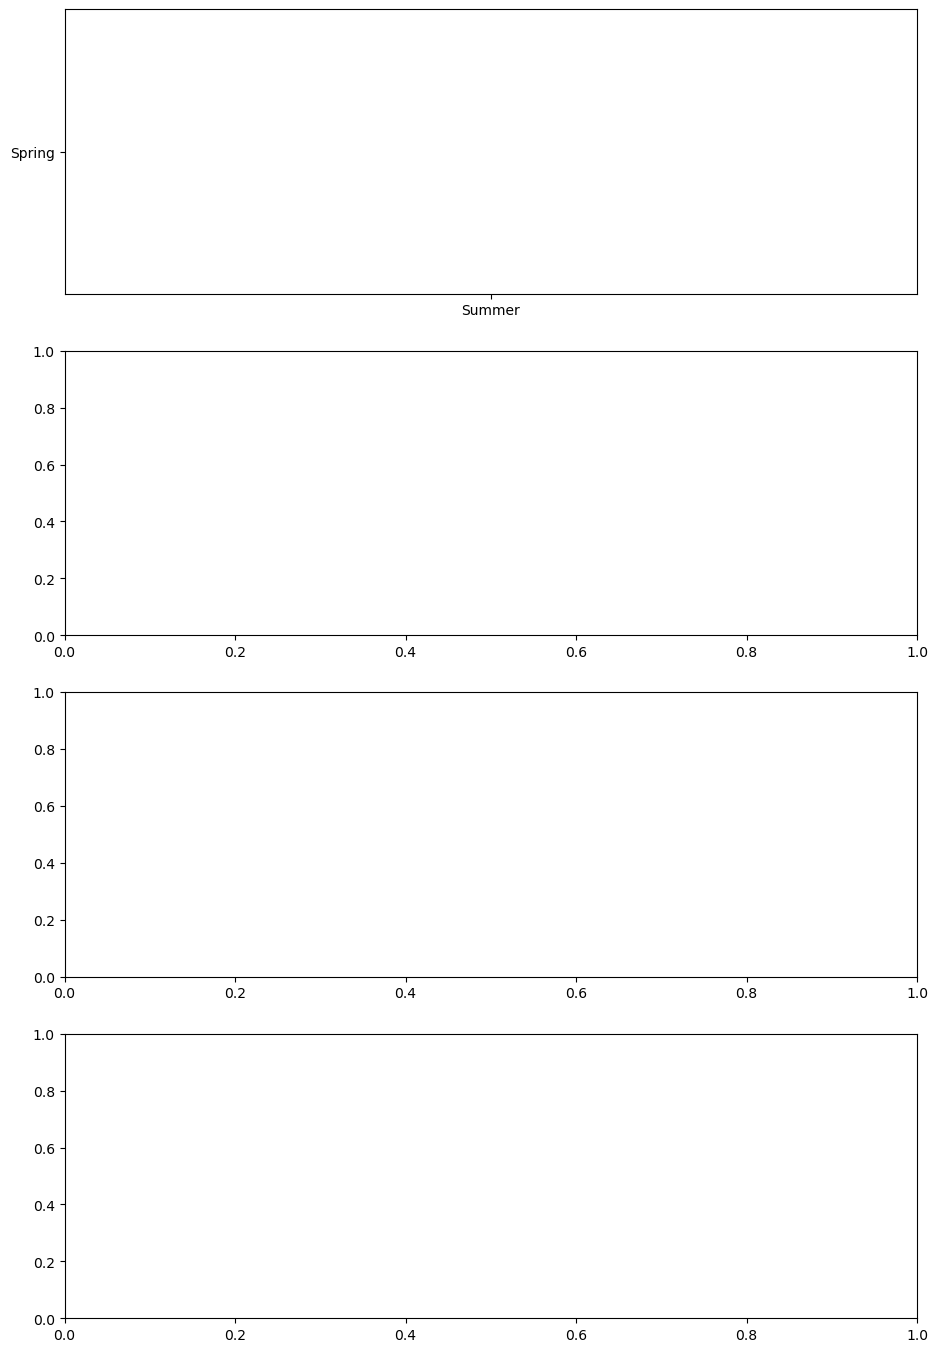

In [193]:
fig, axs = plt.subplots(4, figsize=(11, 17))

axs[0].scatter('Summer',
            filtered_album_df['release_season'])
            # s=sizes,
            # alpha=0.5)


fig.suptitle('Fridays in the fall are the most popular time to release albums',
             fontdict={
                'weight': 'bold',
                'size': 28,
                'color': 'mediumblue'
                }
            )

plt.savefig('./viz/best_release_timing.pdf', format='pdf')

## Release schedule by artist

In [196]:
df['day_of_week'] = df['release_date'].dt.day_name()
df['release_month'] = df['release_date'].dt.month_name()

In [198]:
spring = ['March', 'April', 'May']
summer = ['June', 'July', 'August']
autumn = ['September', 'October', 'November']
winter = ['December', 'January', 'February']

def sort_season(row):
    if row['release_month'] in spring:
        return 'Spring'
    elif row['release_month'] in summer:
        return 'Summer'
    elif row['release_month'] in autumn:
        return 'Autumn'
    else:
        return 'Winter'

df['release_season'] = df.apply(sort_season, axis=1)

ValueError: x and y must be the same size

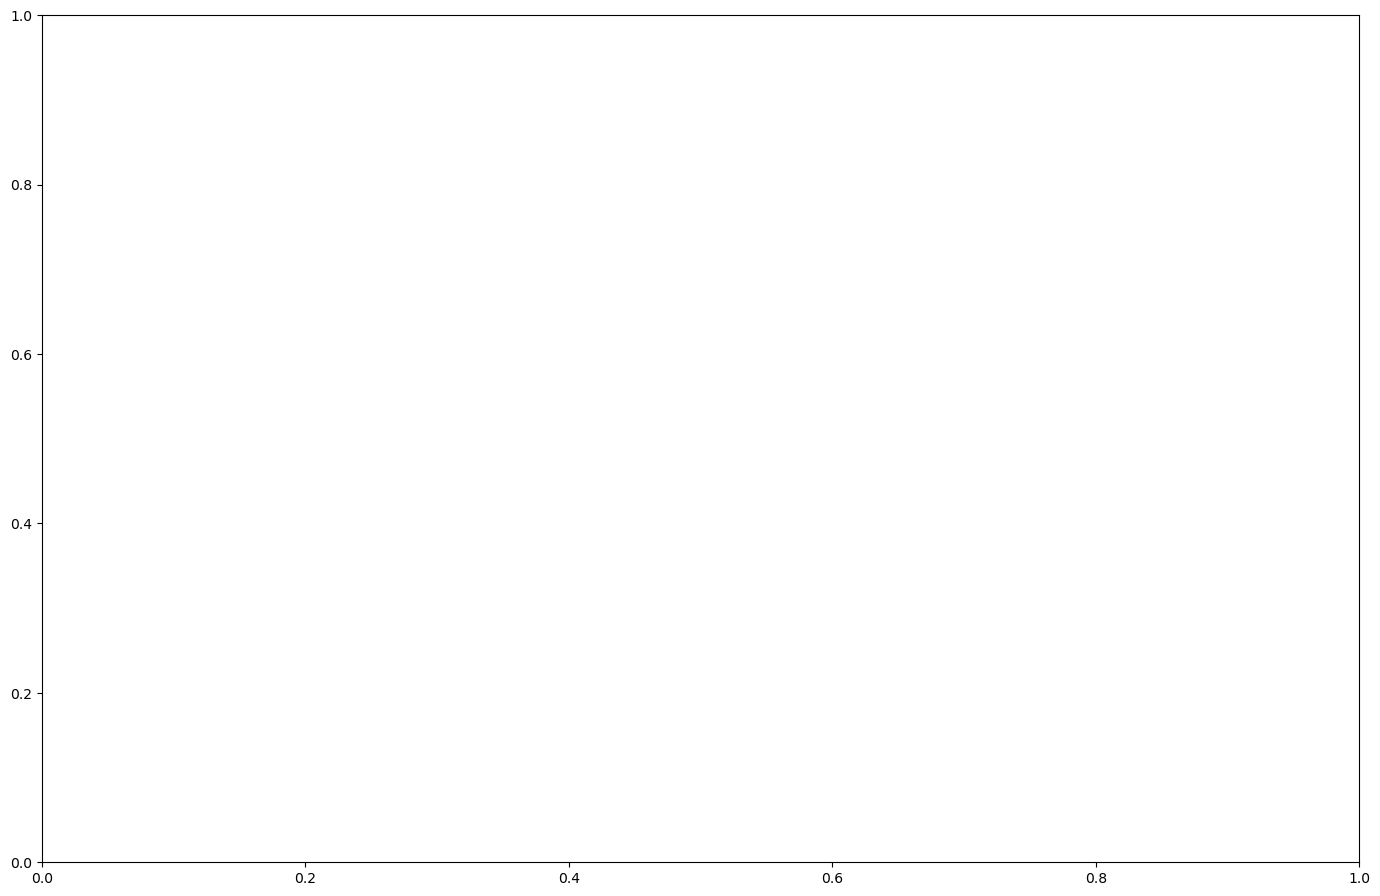

In [200]:
# colors = []
# for i in range(16):
#     colors.append('lightgray')
# for i in range(2):
#     colors.append('lightsteelblue')
# for i in range(2):
#     colors.append('mediumblue')

# artist_df.sort_values('followers', inplace=True)

fig, ax = plt.subplots(figsize=(17, 11))

ax.scatter(
    x=df['release_date'].dt.to_period('M'),
    y=df['release_date'].count()
)

hbars = ax.barh(
    y=artist_df['artist_name'],
    width=artist_df['followers'],
    height=0.5,
    color=colors)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.bar_label(hbars, fmt=' %.0f followers')

ax.set_title('Two artists account for nearly 84% of followers in dataset',
            fontdict={
                'weight': 'bold',
                'size': 28,
                'color': 'mediumblue'
            },
            loc='left')

# rectangle_4 = matplotlib.patches.Rectangle((0, 15.5), 4.1e6, 2, linewidth=1, linestyle='--', edgecolor='lightsteelblue', facecolor='none')
# ax.add_patch(rectangle_4)
# rectangle_2 = matplotlib.patches.Rectangle((0, 17.5), 4.1e6, 2, linewidth=2, edgecolor='mediumblue', facecolor='none')
# ax.add_patch(rectangle_2)

# ax.text(1.5e6, 16.33, '(four most popular artists total more than 94%)', color='lightsteelblue')
plt.savefig('./viz/release_schedule.pdf', format='pdf')

## Popularity vs average track length

In [201]:
df.columns

Index(['artist_name', 'genre', 'followers', 'popularity', 'album_name',
       'release_date', 'total_tracks', 'song_name', 'duration_ms',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'artist_id', 'album_id', 'track_id',
       'day_of_week', 'release_month', 'release_season'],
      dtype='object')

In [220]:
columns = ['artist_name', 'popularity', 'duration_ms']
pop_vs_avg = df[columns].groupby('artist_name').mean()

In [228]:
pop_vs_avg.sort_values('popularity', ascending=False, inplace=True)

In [233]:
pop_vs_avg

,popularity,duration_ms
artist_name,,
"Earth, Wind & Fire",73.0,252420.068536
Chicago,68.0,268323.140678
Jacob Collier,59.0,246674.532787
Jim Brickman,55.0,245921.245700
Ben Folds,50.0,237243.417098
Hilary Hahn,49.0,393178.770751
Chris Thile,47.0,247267.877246
Fernando Ortega,46.0,244564.614833
Béla Fleck,43.0,259149.636872


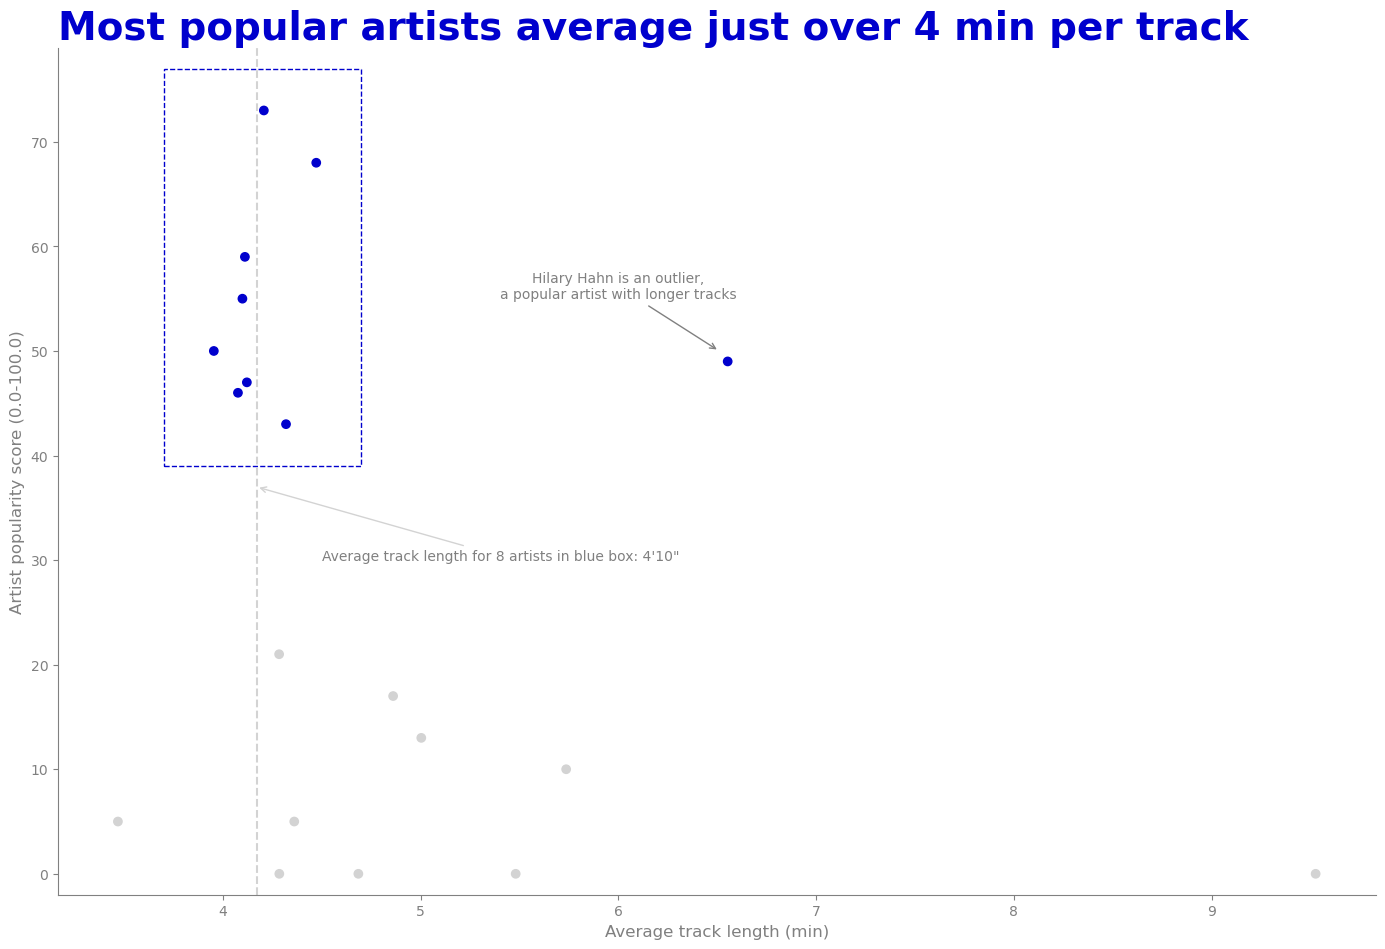

In [324]:
colors = []
for i in range(9):
    colors.append('mediumblue')
for i in range(11):
    colors.append('lightgray')

fig, ax = plt.subplots(figsize=(17, 11))

ax.scatter(x=pop_vs_avg['duration_ms']/1000.0/60,
           y=pop_vs_avg['popularity'],
           c=colors
           )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.tick_params(color='gray', labelcolor='gray')
ax.set_ylim(-2, 79)


ax.set_title('Most popular artists average just over 4 min per track',
            fontdict={
                'weight': 'bold',
                'size': 28,
                'color': 'mediumblue'
            },
            loc='left')

ax.set_xlabel('Average track length (min)',
            fontdict={                
                'size': 12,
                'color': 'gray'
            }
             )

ax.set_ylabel('Artist popularity score (0.0-100.0)',
            fontdict={                
                'size': 12,
                'color': 'gray'
            }
             )

poptangle = matplotlib.patches.Rectangle((3.7, 39), 1, 38, linewidth=1, linestyle='--', edgecolor='mediumblue', facecolor='none')
ax.add_patch(poptangle)

pop_avg = (252420.068536 + 268323.140678 + 246674.532787 + 245921.245700 + 237243.417098 + 247267.877246 + 244564.614833 + 259149.636872) / 8 / 1000.0 / 60
ax.axvline(x=pop_avg, color='lightgray', linestyle='--')

ax.annotate(f'Average track length for 8 artists in blue box: {round(pop_avg)}\'{round((pop_avg % 1) * 60)}"',
            xy=(pop_avg, 37),
            xytext=(4.5, 30),
            ha='left',
            color='gray',
            arrowprops={
                'arrowstyle': '->',
                'color': 'lightgray'
            }
           )

ax.annotate('Hilary Hahn is an outlier,\na popular artist with longer tracks',
            xy=(6.51, 50),
            xytext=(6, 55),
            ha='center',
            color='gray',
            arrowprops={
                'arrowstyle': '->',
                'color': 'gray'
            }
           )

plt.savefig('./viz/popularity_vs_average_length.pdf', format='pdf')

## Danceability vs. track length

In [270]:
df['danceability'].mean()

0.4292691409342844

In [320]:
df['duration_ms'].mean()/1000.0/60

4.448756712139185

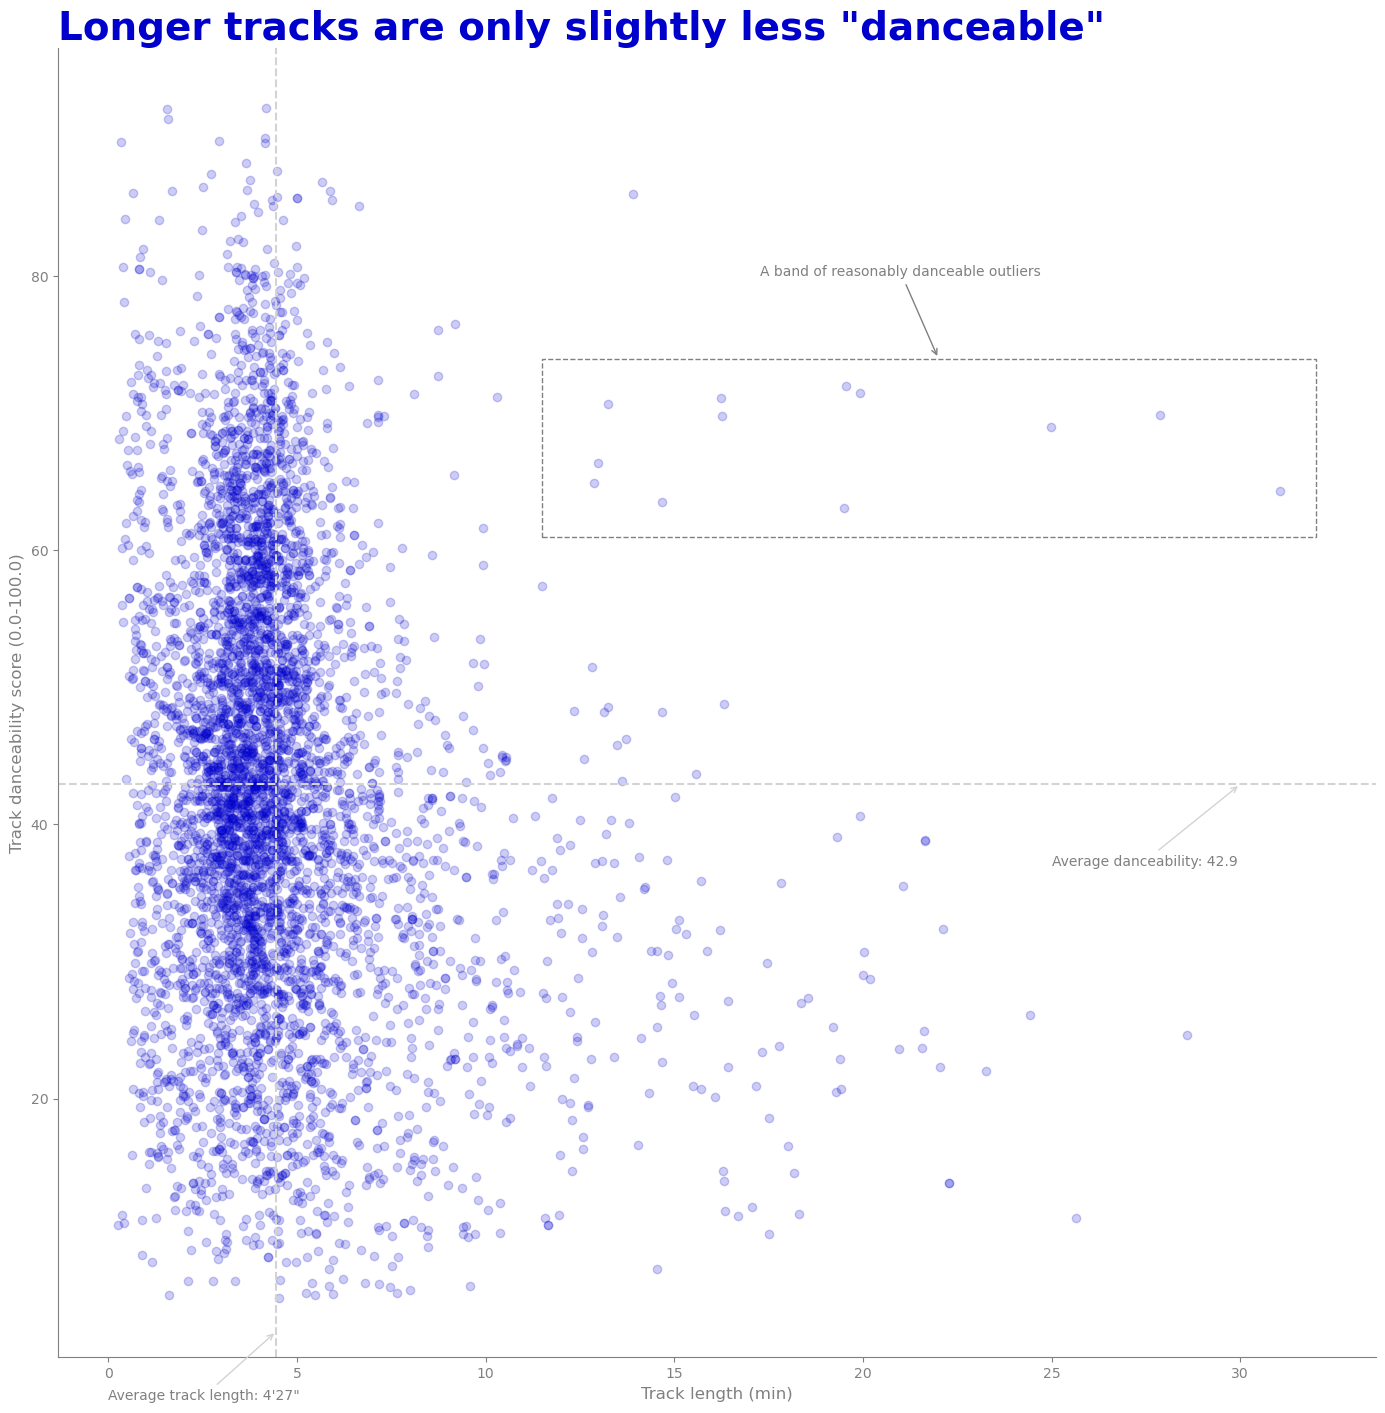

In [332]:
fig, ax = plt.subplots(figsize=(17, 17))

ax.scatter(x=df['duration_ms']/1000.0/60,
           y=df['danceability']*100,
           alpha=0.2,
           c='mediumblue'
           )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.tick_params(color='gray', labelcolor='gray')
# ax.set_ylim(-2, 79)


ax.set_title('Longer tracks are only slightly less "danceable"',
            fontdict={
                'weight': 'bold',
                'size': 28,
                'color': 'mediumblue'
            },
            loc='left')

ax.set_xlabel('Track length (min)',
            fontdict={                
                'size': 12,
                'color': 'gray'
            }
             )

ax.set_ylabel('Track danceability score (0.0-100.0)',
            fontdict={                
                'size': 12,
                'color': 'gray'
            }
             )

dancetangle = matplotlib.patches.Rectangle((11.5, 61), 20.5, 13, linewidth=1, linestyle='--', edgecolor='gray', facecolor='none')
ax.add_patch(dancetangle)

ax.axhline(y=df['danceability'].mean() * 100, color='lightgray', linestyle='--')
ax.annotate('Average danceability: 42.9',
            xy=(30, df['danceability'].mean() * 100),
            xytext=(25, 37),
            ha='left',
            color='gray',
            arrowprops={
                'arrowstyle': '->',
                'color': 'lightgray'
            }
           )

ax.axvline(x=df['duration_ms'].mean()/1000.0/60, color='lightgray', linestyle='--')
ax.annotate('Average track length: 4\'27"',
            xy=(df['duration_ms'].mean()/1000.0/60, 3),
            xytext=(0, -2),
            ha='left',
            color='gray',
            arrowprops={
                'arrowstyle': '->',
                'color': 'lightgray'
            }
           )

ax.annotate('A band of reasonably danceable outliers',
            xy=(22, 74),
            xytext=(21, 80),
            ha='center',
            color='gray',
            arrowprops={
                'arrowstyle': '->',
                'color': 'gray'
            }
           )

plt.savefig('./viz/danceability_vs_average_length.pdf', format='pdf')